All my imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, cohen_kappa_score, ConfusionMatrixDisplay, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mord import LogisticAT
from imblearn.over_sampling import SMOTE

In [16]:
df = pd.read_csv('../Data/Cleaned_Student_Performance_data.csv')
display(df.head(10))

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,15.408756,0,0,1,0,0,0,0,1
1,4.210570,26,0,2,0,0,0,0,4
2,10.028829,14,0,3,1,0,0,0,3
3,4.672495,17,1,3,0,0,0,0,4
4,8.191219,0,0,1,1,0,0,0,1
5,15.601680,10,0,3,0,1,0,0,2
6,15.424496,22,1,1,1,0,0,0,4
7,18.444466,0,0,3,1,0,0,0,0
8,11.851364,11,0,1,0,0,0,0,3
9,10.038712,21,0,3,1,0,0,0,4


Understanding the Dataset: 

In [17]:
df.isnull().sum()

StudyTimeWeekly    0
Absences           0
Tutoring           0
ParentalSupport    0
Extracurricular    0
Sports             0
Music              0
Volunteering       0
GradeClass         0
dtype: int64

In [18]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudyTimeWeekly  1625 non-null   float64
 1   Absences         1625 non-null   int64  
 2   Tutoring         1625 non-null   int64  
 3   ParentalSupport  1625 non-null   int64  
 4   Extracurricular  1625 non-null   int64  
 5   Sports           1625 non-null   int64  
 6   Music            1625 non-null   int64  
 7   Volunteering     1625 non-null   int64  
 8   GradeClass       1625 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.4 KB


None

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudyTimeWeekly,1625.0,9.821508,5.690213,0.001057,5.044463,9.757532,14.498205,19.978094
Absences,1625.0,14.611692,8.535711,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,1625.0,0.316308,0.465178,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,1625.0,2.104000,1.133194,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,1625.0,0.388308,0.487515,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,1625.0,0.310769,0.462951,0.000000,0.000000,0.000000,1.000000,1.000000
Music,1625.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Volunteering,1625.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GradeClass,1625.0,3.089846,1.161493,0.000000,2.000000,4.000000,4.000000,4.000000


In [20]:
#distribution of target variable
df['GradeClass'].value_counts().sort_index()

GradeClass
0     50
1    153
2    270
3    280
4    872
Name: count, dtype: int64

In [21]:
#Checking the correlation between tutoring and GPA in the dataset
df.corr()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
StudyTimeWeekly,1.000000,-0.006450,0.049706,0.032339,-0.013866,0.021253,NaN,NaN,-0.182055
Absences,-0.006450,1.000000,0.003813,-0.001488,-0.019825,0.035543,NaN,NaN,0.823242
Tutoring,0.049706,0.003813,1.000000,0.008812,0.011974,0.003616,NaN,NaN,-0.108475
ParentalSupport,0.032339,-0.001488,0.008812,1.000000,0.014909,0.004085,NaN,NaN,-0.153536
Extracurricular,-0.013866,-0.019825,0.011974,0.014909,1.000000,-0.016630,NaN,NaN,-0.111673
Sports,0.021253,0.035543,0.003616,0.004085,-0.016630,1.000000,NaN,NaN,-0.046232
Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volunteering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeClass,-0.182055,0.823242,-0.108475,-0.153536,-0.111673,-0.046232,NaN,NaN,1.000000


This is the beginning of logistical regression

In [22]:
X = df.drop('GradeClass', axis = 1)
y = df['GradeClass']

numerical_cols = ['StudyTimeWeekly', 'Absences']
ordinal_cols = ['ParentalSupport']
categorical_cols = ['Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(), ordinal_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

In [24]:
X_preprocessed = preprocessor.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [27]:
# Check the new distribution
print("Distribution of GradeClass after SMOTE:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

Distribution of GradeClass after SMOTE:
GradeClass
0    698
1    698
2    698
3    698
4    698
Name: count, dtype: int64


In [28]:
model = LogisticAT()

In [29]:
# Define the parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Perform GridSearchCV
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticAT(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [30]:
#Looks for the best model in alpha
print("Best alpha:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best alpha: {'alpha': 0.1}


In [31]:
y_pred = best_model.predict(X_test)

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.70      0.68      0.69        31
           2       0.73      0.59      0.65        54
           3       0.59      0.84      0.70        56
           4       0.99      0.89      0.94       174

    accuracy                           0.81       325
   macro avg       0.72      0.78      0.74       325
weighted avg       0.84      0.81      0.82       325



In [33]:
#mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.19


In [34]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.2f}")

Cohen's Kappa: 0.72


In [35]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 0.44


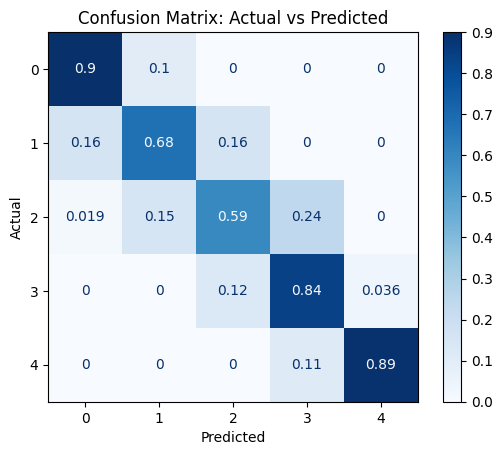

In [36]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

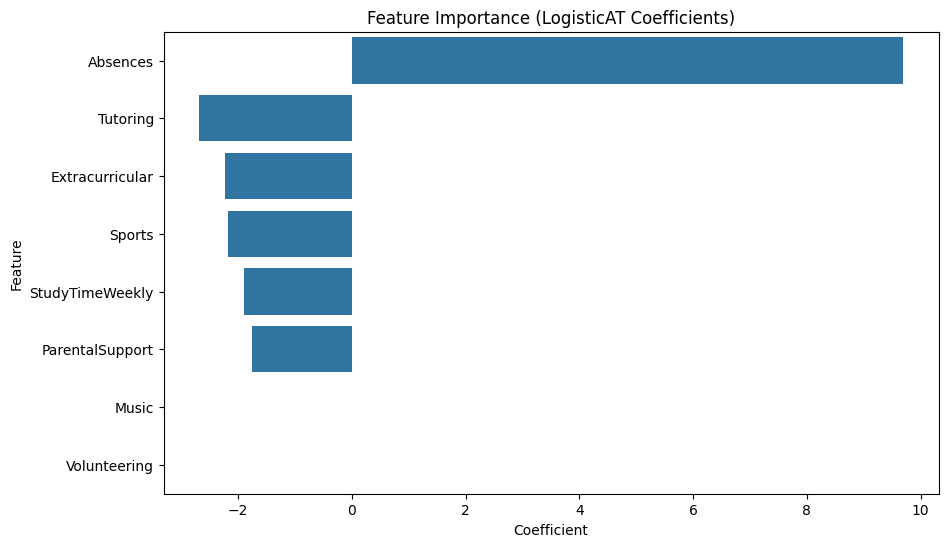


Feature Importance:
           Feature  Coefficient
1         Absences     9.699492
3         Tutoring    -2.691231
4  Extracurricular    -2.227988
5           Sports    -2.183003
0  StudyTimeWeekly    -1.906306
2  ParentalSupport    -1.763516
6            Music     0.000000
7     Volunteering     0.000000


In [37]:
feature_names = numerical_cols + ordinal_cols + categorical_cols
coefs = best_model.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance (LogisticAT Coefficients)")
plt.show()

print("\nFeature Importance:")
print(coef_df)

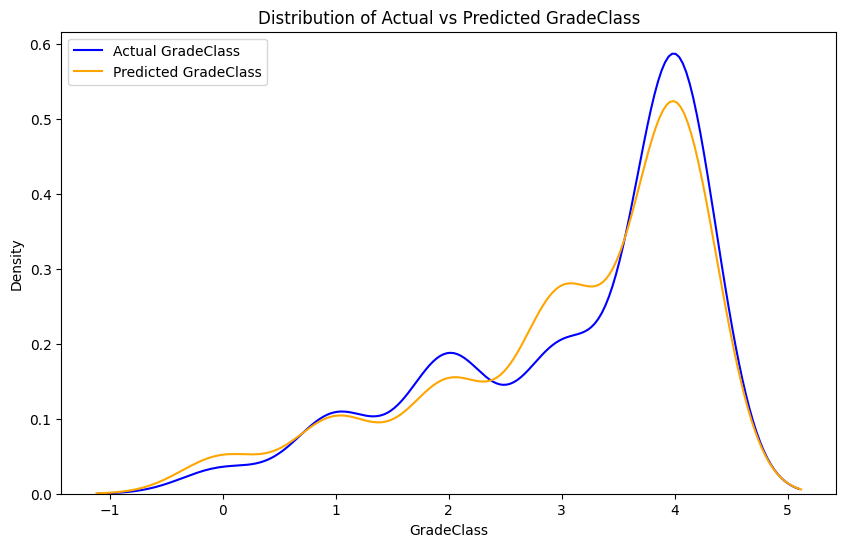

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual GradeClass', color='blue')
sns.kdeplot(y_pred, label='Predicted GradeClass', color='orange')
plt.title('Distribution of Actual vs Predicted GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Density')
plt.legend()
plt.show()